In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collecting Data

In [ ]:
data = pd.read_csv('./tvshows.csv')
data

# Meaningful Question

Câu 1: What is best show ?

## Benefit of finding the answer:
The benefit of finding the answer to this question is that it will help you find the best show. The best show is found by ratings, votes, emmys with same weight.


In [ ]:
matrix_corr = data[['Runtime', 'Rating', 'Number of Votes', 'Emmys']].corr()
matrix_corr

,Runtime,Rating,Number of Votes,Emmys
Runtime,1.000000,-0.031706,0.076381,0.021564
Rating,-0.031706,1.000000,0.190486,0.078712
Number of Votes,0.076381,0.190486,1.000000,0.134836
Emmys,0.021564,0.078712,0.134836,1.000000


                  Title  Composite Score
29      Secret Invasion         0.203409
30               Cursed         0.171555
31                 Joey         0.094412
32                 Echo         0.137918
33      Black Lightning         0.126259
...                 ...              ...
1124         The Chosen         0.406374
1127     Blue Planet II         0.523449
1129  Sapne Vs Everyone         0.310786
1130              Bluey         0.266598
1136    Planet Earth II         0.847403

[855 rows x 2 columns]


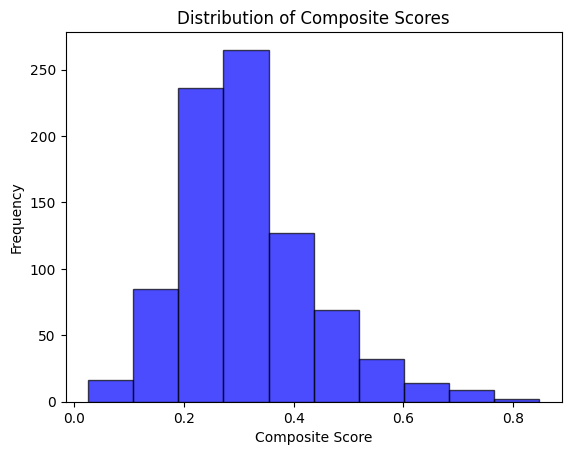

Top 10 shows:
                         Title  Composite Score
1136           Planet Earth II         0.847403
1062          When They See Us         0.828824
815   Buffy the Vampire Slayer         0.750693
933             Silicon Valley         0.740945
1068      Curb Your Enthusiasm         0.732558
734                      Chuck         0.718521
1084             Gravity Falls         0.712262
990                  Justified         0.707468
680                 Black Bird         0.693882
1113            The Last Dance         0.689755


In [ ]:
df = pd.DataFrame(data)

# Min-Max Normalization
# For each column, apply the formula: (x - min) / (max - min)
df['Runtime_norm'] = (df['Runtime'] - df['Runtime'].min()) / (df['Runtime'].max() - df['Runtime'].min())
df['Rating_norm'] = (df['Rating'] - df['Rating'].min()) / (df['Rating'].max() - df['Rating'].min())
df['Votes_norm'] = (df['Number of Votes'] - df['Number of Votes'].min()) / (df['Number of Votes'].max() - df['Number of Votes'].min())
df['Emmys_norm'] = (df['Emmys'] - df['Emmys'].min()) / (df['Emmys'].max() - df['Emmys'].min())


# Define weights for each factor
runtime_weight = 1/4
rating_weight = 1/4
votes_weight = 1/4
emmys_weight = 1/4

# Calculate the composite score using the weighted sum of normalized factors
df['Composite Score'] = (
    df['Runtime_norm'] *runtime_weight +
    df['Rating_norm'] * rating_weight +
    df['Votes_norm'] * votes_weight +
    df['Emmys_norm'] * emmys_weight
)

print(df[['Title', 'Composite Score']])
# Plot histogram of composite scores
plt.hist(df['Composite Score'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Composite Scores')
plt.xlabel('Composite Score')
plt.ylabel('Frequency')
plt.show()


# Select the shows with the highest composite scores
top_shows = df.nlargest(10, 'Composite Score')[['Title', 'Composite Score']]
print("Top 10 shows:")
print(top_shows)

Câu 2: What are the trends in runtime and ratings over the years?
• Benefit: Identifies if shorter or longer shows are trending, helping producers adapt their 
strategies.
• How to Find the Answer: Plot runtime vs. rating over years using line or scatter plots.

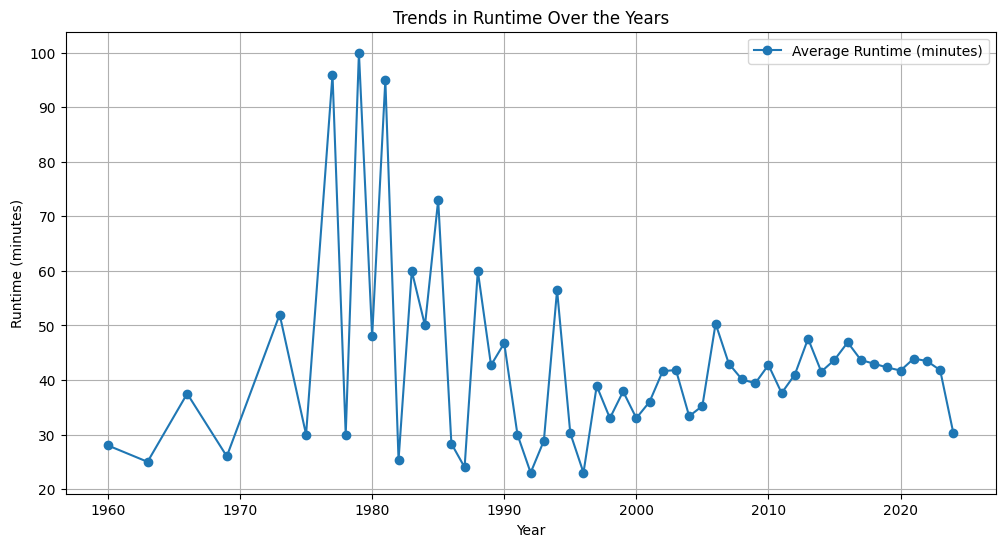

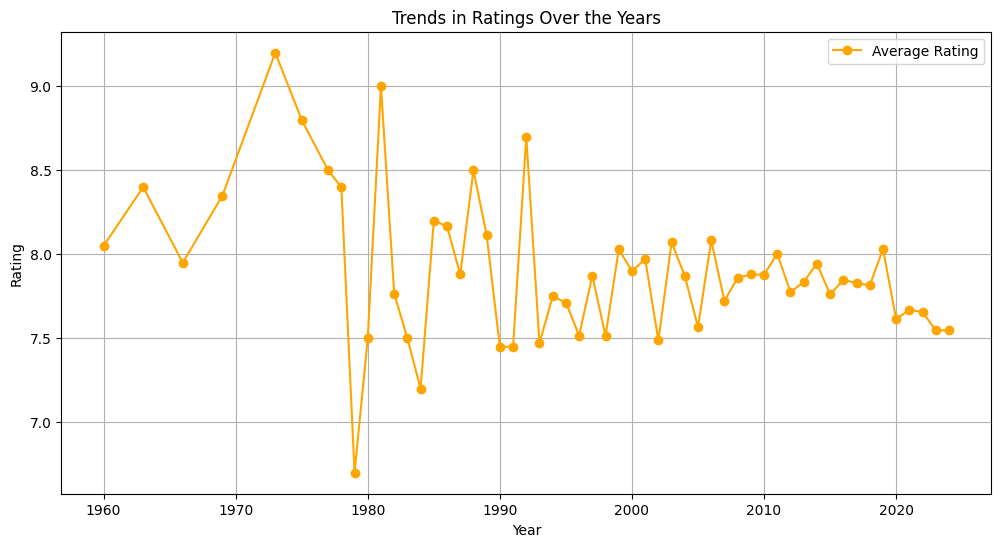

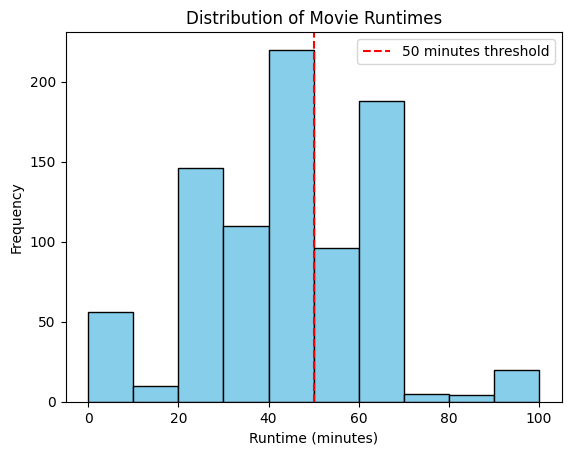

In [ ]:


# Convert rating to float
data['Rating'] = data['Rating'].astype(float)

# Expand the Years column into start and end years
data[['Year_Start', 'Year_End']] = pd.DataFrame(data['Years'].tolist(), index=data.index)

# Use only the start year for trend analysis
data['Year'] = data['Year_Start']

# Group data by Year and calculate average runtime and rating
grouped_data = data.groupby('Year')[['Runtime', 'Rating']].mean()


# Plot runtime trends over years
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Runtime'], marker='o', label='Average Runtime (minutes)')
plt.xlabel('Year')
plt.ylabel('Runtime (minutes)')
plt.title('Trends in Runtime Over the Years')
plt.legend()
plt.grid(True)
plt.show()

# Plot ratings trends over years
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Rating'], marker='o', color='orange', label='Average Rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Trends in Ratings Over the Years')
plt.legend()
plt.grid(True)
plt.show()

#Biểu đồ histogram để xem phân bố thời lượng của tất cả các bộ phim.
plt.hist(df['Runtime'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.axvline(50, color='red', linestyle='--', label='50 minutes threshold')
plt.legend()
plt.show()



Có vẻ người xem thích những bộ phim ngắn, có thời lượng dưới 50 phút.

Vậy chúng ta tìm xem vị trí của những bộ phim có thời lượng ngắn trong các bộ phim hay nhất mà ta đã xếp hạng.

In [ ]:
# Bước 1: Lấy các bộ phim có thời lượng dưới 50 phút
short_runtime_movies = df[df['Runtime'] < 50]

# Bước 2: Lấy 20 bộ phim có Composite Score cao nhất từ short_runtime_movies
top_20_short_runtime = short_runtime_movies.nlargest(20, 'Composite Score')

# Bước 3: Tìm vị trí của các bộ phim đó trong danh sách toàn bộ dựa trên Composite Score
positions_in_all = df['Composite Score'].rank(ascending=False)
top_20_short_runtime['Rank in All'] = top_20_short_runtime['Composite Score'].rank(ascending=False).astype(int)

# Hiển thị kết quả
print("Các bộ phim dưới 50 phút:")
print(short_runtime_movies[['Title', 'Composite Score']])

print("\nTop 20 bộ phim có thời lượng dưới 50 phút (và vị trí trong danh sách toàn bộ):")
print(top_20_short_runtime[['Title', 'Composite Score', 'Rank in All']])

Các bộ phim dưới 50 phút:
                      Title  Composite Score
29          Secret Invasion         0.203409
31                     Joey         0.094412
32                     Echo         0.137918
33          Black Lightning         0.126259
34           The Langoliers         0.025253
...                     ...              ...
1108         Sandeep Bhaiya         0.305014
1111           TVF Pitchers         0.400144
1118  The Filthy Frank Show         0.243777
1129      Sapne Vs Everyone         0.310786
1130                  Bluey         0.266598

[542 rows x 2 columns]

Top 20 bộ phim có thời lượng dưới 50 phút (và vị trí trong danh sách toàn bộ):
                                              Title  Composite Score  \
815                        Buffy the Vampire Slayer         0.750693   
933                                  Silicon Valley         0.740945   
1068                           Curb Your Enthusiasm         0.732558   
734                                       

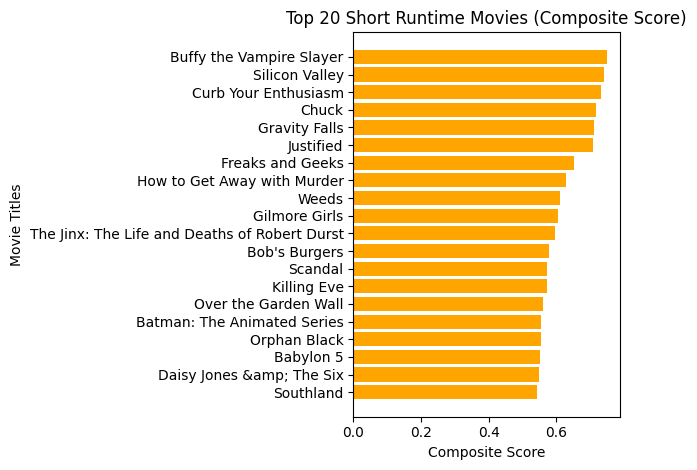

In [ ]:
#Top 20 phim ngắn với Composite Score cao nhất

top_20_short_runtime = top_20_short_runtime.sort_values('Composite Score', ascending=True)

plt.barh(top_20_short_runtime['Title'], top_20_short_runtime['Composite Score'], color='orange')
plt.title('Top 20 Short Runtime Movies (Composite Score)')
plt.xlabel('Composite Score')
plt.ylabel('Movie Titles')
plt.tight_layout()
plt.show()


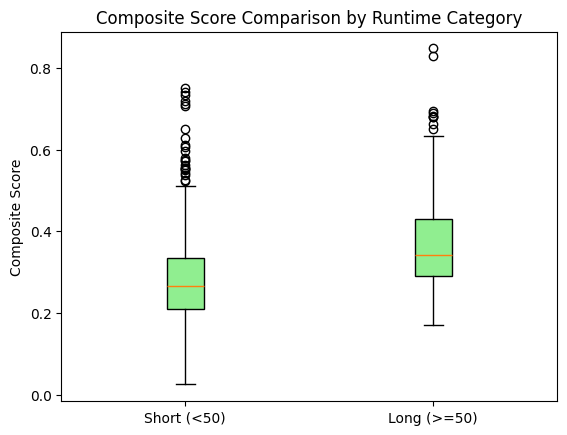

In [ ]:
#So sánh thời lượng phim ngắn và dài

df['Runtime Category'] = df['Runtime'].apply(lambda x: 'Short (<50)' if x < 50 else 'Long (>=50)')
plt.boxplot(
    [df[df['Runtime Category'] == 'Short (<50)']['Composite Score'], 
     df[df['Runtime Category'] == 'Long (>=50)']['Composite Score']],
    labels=['Short (<50)', 'Long (>=50)'],
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen')
)
plt.title('Composite Score Comparison by Runtime Category')
plt.ylabel('Composite Score')
plt.show()


Câu 3: Is there a relationship between runtime and rating?
• Benefit: Determines if viewers prefer shorter or longer formats.
• How to Find the Answer: Plot runtime vs. rating using scatter plots with regression lines.

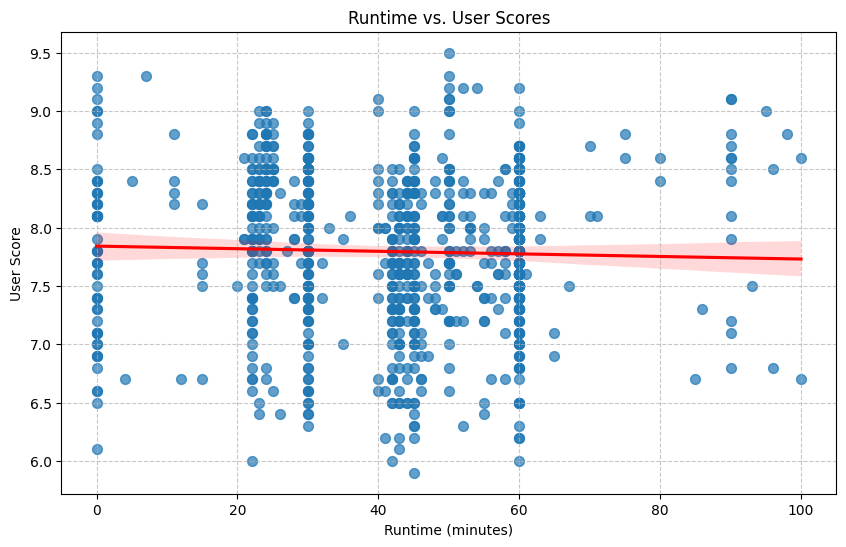

Correlation between Runtime and User Scores: -0.03


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # Sample data (replace this with your actual dataset)
# data = pd.DataFrame({
#     'Runtime': [45, 25, 44, 45, 35, 60, 120, 30],
#     'User_Score': [1.2, 1.6, 2.9, 3.6, 4.1, 8.5, 9.3, 6.7]
# })

# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Runtime', y='Rating', scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Runtime vs. User Scores')
plt.xlabel('Runtime (minutes)')
plt.ylabel('User Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Calculate correlation between Runtime and User Scores
correlation = data['Runtime'].corr(data['Rating'])
print(f"Correlation between Runtime and User Scores: {correlation:.2f}")


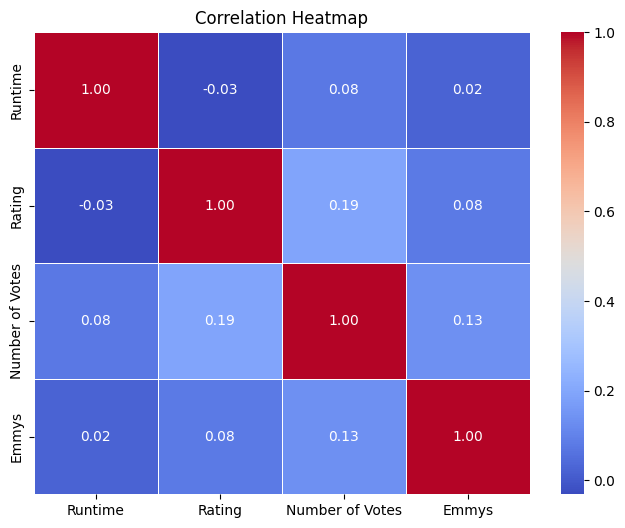

In [ ]:
# mối quan hệ giữa rating và các cột còn lại
# Tính hệ số tương quan giữa Rating và các cột còn lại
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


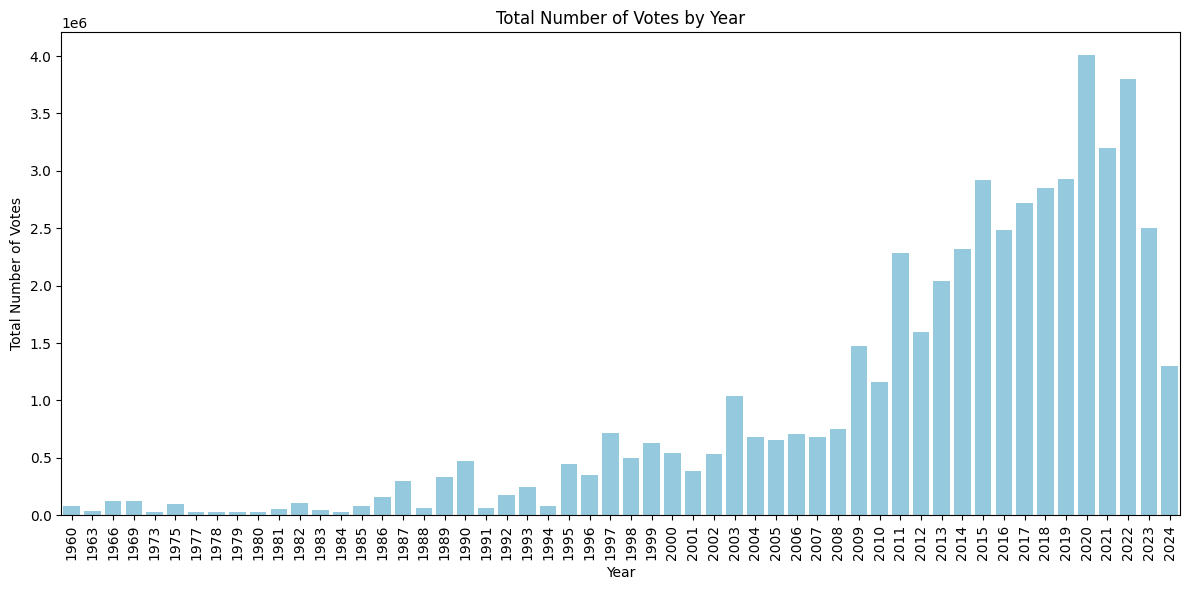

In [ ]:
# Biểu đồ giữa Number of Votes và Year dùng barchart

import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Year' và tính tổng số phiếu bầu 'Number of Votes' cho mỗi năm
votes_by_year = data.groupby('Year')['Number of Votes'].sum().reset_index()

# Vẽ bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=votes_by_year, x='Year', y='Number of Votes', color='skyblue')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Total Number of Votes by Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Votes')
# Xoay nhãn trục x 90 độ
plt.xticks(rotation=90)
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Những năm gần đây số lượt vote rất cao chúng tỏ ngành công nghiệp phim rất phát triển. (Lấy 1 vài năm để ví dụ). Tuy nhiên lúc cào dữ liệu trên trang web thì năm 2024 chưa hết nên số lượng có ít hơn.

Huấn luyện model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Giả sử data đã được chuẩn bị và có cột 'Runtime', 'Number of Votes', 'Emmys', 'Rating'

# Chọn các đặc trưng (features) và nhãn (target)
X = data[['Runtime', 'Number of Votes', 'Emmys']]  # Các cột đầu vào
y = data['Rating']  # Cột đầu ra (nhãn)

# Chia tập train-test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Định nghĩa các tập đặc trưng
features_list = [
    ['Runtime'],                         # 1 cột
    ['Runtime', 'Number of Votes'],      # 2 cột
    ['Runtime', 'Number of Votes', 'Emmys']  # 3 cột
]

# Lưu kết quả
results = []

# Lặp qua từng bộ đặc trưng
for features in features_list:
    # Tách tập huấn luyện và kiểm tra
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    # Khởi tạo và huấn luyện mô hình
    model = LinearRegression()
    model.fit(X_train_subset, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test_subset)


    coefficients = pd.DataFrame({
        'Feature': X_train_subset.columns,  # Các tên cột đặc trưng
        'Coefficient': model.coef_  # Trọng số của từng đặc trưng
    })

    # Đánh giá mô hình
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Lưu kết quả
    results.append({
        'Features': features,
        'MSE': mse,
        'MAE': mae,
        'R²': r2
    })

# Hiển thị kết quả
results_df = pd.DataFrame(results)
print("Hiệu năng của các mô hình dựa trên số lượng đặc trưng:")
print(results_df)


Hiệu năng của các mô hình dựa trên số lượng đặc trưng:
                            Features       MSE       MAE        R²
0                          [Runtime]  0.453417  0.541042  0.001367
1         [Runtime, Number of Votes]  0.445218  0.525875  0.019426
2  [Runtime, Number of Votes, Emmys]  0.444137  0.526944  0.021807


In [ ]:
# Tính Composite Score dựa trên trọng số từ mô hình
data['Weighted Composite Score'] = (
    X['Runtime'] * coefficients['Coefficient'][0] +
    X['Number of Votes'] * coefficients['Coefficient'][1] +
    X['Emmys'] * coefficients['Coefficient'][2]
)

# Hiển thị kết quả
print(data[['Title', 'Weighted Composite Score']])

                  Title  Weighted Composite Score
29      Secret Invasion                  0.255548
30               Cursed                  0.071956
31                 Joey                  0.144548
32                 Echo                  0.112841
33      Black Lightning                  0.064765
...                 ...                       ...
1124         The Chosen                  0.138855
1127     Blue Planet II                  0.205703
1129  Sapne Vs Everyone                  0.257878
1130              Bluey                  0.113846
1136    Planet Earth II                  0.694070

[855 rows x 2 columns]


In [ ]:
# Show lại kết quả các chương trình hay nhất

res = data.sort_values(by='Weighted Composite Score', ascending=False)[['Title', 'Weighted Composite Score']]
print(res.nlargest(n=10, columns='Weighted Composite Score')[['Title', 'Weighted Composite Score']])


print(top_shows)


print(res.loc[top_shows.index])

                            Title  Weighted Composite Score
933                Silicon Valley                  0.740306
815      Buffy the Vampire Slayer                  0.702856
1136              Planet Earth II                  0.694070
1068         Curb Your Enthusiasm                  0.674928
1084                Gravity Falls                  0.659148
673   How to Get Away with Murder                  0.656745
734                         Chuck                  0.652866
821                    The Heroes                  0.613822
871                         Andor                  0.612154
447                   The Sandman                  0.611492
                         Title  Composite Score
1136           Planet Earth II         0.847403
1062          When They See Us         0.828824
815   Buffy the Vampire Slayer         0.750693
933             Silicon Valley         0.740945
1068      Curb Your Enthusiasm         0.732558
734                      Chuck         0.718521
1084

Có sự chênh lệch giữa chúng ta ước lượng và 